<center> <a href="https://github.com/CyConProject?tab=repositories">
  <img src="https://github.com/CyConProject/Lab/blob/main/Figures/CyCon.png?raw=true" alt="logo" width="80" >
</a>
 </center>

# Multiple Linear Regression

In this lab, we will explore the concept of multiple linear regression and its application in construction. Multiple linear regression is a statistical technique that allows us to understand the relationship between a dependent variable and multiple independent variables. We will learn how to build a multiple linear regression model, interpret the results, and make predictions. This knowledge will enable the construction workforce to analyze and predict various construction-related factors, such as the compressive strength of concrete, based on historical data.

### Objectives:

After completing this lab, you will have achieved the following:

  - Implement multiple linear regression using scikit-learn.
  - Create a regression model with multiple independent variables.
  - Train the regression model on a dataset.
  - Test the regression model using the test dataset.
  - Evaluate the performance of the regression model using evaluation metrics such as mean squared error (MSE) and coefficient of determination (R-squared).

By mastering these concepts and techniques, you will gain valuable skills in implementing and utilizing multiple linear regression models for predictive analysis.

### Step 1: Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 2: Load the construction dataset

In [2]:
# Load the dataset
url = 'https://raw.githubusercontent.com/CyConProject/Lab/main/Datasets/Concrete_Data.csv'
df = pd.read_csv(url)

### Step 3: Explore the dataset

In [3]:
# Display the first few rows of the dataset
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


#### `Concrete_Data.csv`:

The regression problem focuses on predicting the concrete compressive strength using its components as well as its age. The variables are listed in the same order as the numerical values in the database rows.

    Name -- Data Type -- Measurement -- Description
1.   **Cement** -- quantitative -- kg in a m3 mixture -- Input Variable
2.   **Blast Furnace Slag** -- quantitative -- kg in a m3 mixture -- Input Variable
3.   **Fly Ash** -- quantitative -- kg in a m3 mixture -- Input Variable
4.   **Water** -- quantitative -- kg in a m3 mixture -- Input Variable
5.   **Superplasticizer** -- quantitative -- kg in a m3 mixture -- Input Variable
6.   **Coarse Aggregate** -- quantitative -- kg in a m3 mixture -- Input Variable
7.   **Fine Aggregate** -- quantitative -- kg in a m3 mixture -- Input Variable
8.   **Age** -- quantitative -- Day (1~365) -- Input Variable
9.   **Concrete compressive strength** -- quantitative -- MPa -- Output Variable


[`Data source`](https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength)

### Step 4: Data analysis
Let's begin by performing a descriptive exploration of our data.

In [4]:
# Generates a statistical summary of the DataFrame.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
flyash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseaggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineaggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
csMPa,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


Next, we will select a few features to explore in more detail.

In [5]:
selected_features = df[['cement', 'superplasticizer', 'age', 'csMPa']]
selected_features.head(10)

,cement,superplasticizer,age,csMPa
0,540.0,2.5,28,79.99
1,540.0,2.5,28,61.89
2,332.5,0.0,270,40.27
3,332.5,0.0,365,41.05
4,198.6,0.0,360,44.30
5,266.0,0.0,90,47.03
6,380.0,0.0,365,43.70
7,380.0,0.0,28,36.45
8,266.0,0.0,28,45.85
9,475.0,0.0,28,39.29


Now, let's examine the relationship between each feature and the compressive strength of the sample.

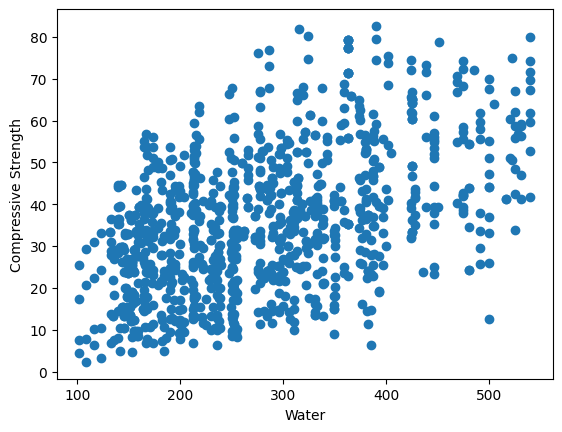

In [6]:
plt.scatter(df.cement, df.csMPa)
plt.xlabel("Water")
plt.ylabel("Compressive Strength")
plt.show()

### Step 5: Create train and test datasets
In this section, we first assign the input features to X and the target variable to y. Next, we split the data into train and test sets using train_test_split from sklearn.model_selection.

You can always adjust the test_size parameter as per your preference. In this code, we set `test_size=0.2`. Therefore, 20% of the data would be saved as the test dataset.

In [7]:
from sklearn.model_selection import train_test_split

# Split the dataset into input features (X) and target variable (y)
X = df.drop('csMPa', axis=1)
y = df['csMPa']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 6: Training the model
Now let's move on to creating a multiple regression model and training it on the training dataset.

We first import LinearRegression from sklearn.linear_model. We then create an instance of the linear regression model and assign it to the variable model. Finally, we fit the model to `'cement'`, `'superplasticizer'`, and `'age'` attributes and from training data and `y_train` using the fit method.

In [8]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train[['cement', 'superplasticizer','age']], y_train)
print ('Coefficients: ', model.coef_)

Coefficients:  [0.06774193 1.0873851  0.10019339]


As discussed before, Multiple Linear Regression is a statistical technique used to model the relationship between multiple independent variables and a dependent variable. The goal is to find coefficients that represent the effect of each predictor on the target variable.

These coefficients are estimated using the Ordinary Least Squares (OLS) method, which minimizes the sum of squared differences between actual and predicted values. The coefficients indicate the change in the target variable for a one-unit change in each predictor, while holding other predictors constant.

In the provided code, the LinearRegression model is fitted to the training data, and the coef_ attribute returns the coefficients for the predictors `'cement'`, `'superplasticizer'`, and `'age'`.

### Step 7: Evaluation of the model
Finally, let's evaluate the performance of our regression model.

In order to assess the performance of our regression model, we calculate two evaluation metrics based on a comparison between the predicted values and the actual values from the test set.

First, we calculate the coefficient of determination (R-squared) using the `r2_score `function from `sklearn.metrics`. R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher R-squared value (closer to 1) indicates a better fit of the model to the data.

Then, we calculate the mean squared error (MSE) using the `np.mean `function. MSE measures the average squared difference between the predicted and actual values. A lower MSE indicates a better fit of the model to the data.

By calculating and examining these evaluation metrics, we gain insights into the accuracy and performance of our regression model.

In [9]:
from sklearn.metrics import r2_score

# Predict on the test data
y_pred = model.predict(X_test[['cement', 'superplasticizer','age']])

# Calculate Mean Squared Error (MSE)
mse = np.mean((y_test - y_pred) ** 2)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE):%.3f' % mse)
print('R-squared (R2) score:%.3f' %r2)

Mean Squared Error (MSE):120.271
R-squared (R2) score:0.533


### **Conclusion**

The multiple linear regression model provides valuable insights into the relationship between the selected predictors and the target variable. The model's performance can be further evaluated and improved using additional techniques, and consideration should be given to exploring other potential predictors to enhance the model's predictive power.

## Practice

Try to train two multiple linear regression models with the same dataset, using these two sets of features:

   - model1 trained based on: `X_train[['cement', 'water', 'superplasticizer','age']]` features.

   - model2  trained based on: `X_train[['cement', 'coarseaggregate', 'superplasticizer','age']]` features.

Calculate the evaluation metrics for these two models.

Compare the evaluation metrics with the model that we trained above.

In [ ]:
# Create two linear regression models
model1 = LinearRegression()
model2 = LinearRegression()

# Fit the models to their training data
# YOUR CODE
# YOUR CODE

<details><summary>Click here for the answer</summary>

```python    
# Create two linear regression models
model1 = LinearRegression()
model2 = LinearRegression()

# Fit the models to their training data
model1.fit(X_train[['cement', 'water', 'superplasticizer','age']], y_train)
model2.fit(X_train[['cement', 'coarseaggregate', 'superplasticizer','age']], y_train)
```

</details>

Now, obtain the predictions for both models by using the `predict` function and the selected features for each model in the test data.

In [ ]:
# Predict on the test data
y_pred1 = # YOUR CODE
y_pred2 = # YOUR CODE

<details><summary>Click here for the answer</summary>

```python    
# Predict on the test data
y_pred1 = model1.predict(X_test[['cement', 'water', 'superplasticizer','age']])
y_pred2 = model2.predict(X_test[['cement', 'coarseaggregate', 'superplasticizer','age']])
```

</details>

Lastly, calculate the two evaluation metrics by utilizing `y_pred1` and `y_pred2` and the `y_test` data.
This can be done by applying the `np.mean` function to obtain the average of the differences between the true values and the predicted values.

In [ ]:
# Calculate Mean Squared Error (MSE) for both models:
mse_model1 = # YOUR CODE
mse_model2 = # YOUR CODE

# Calculate R-squared (R2) score
r2_model1 = # YOUR CODE
r2_model2 = # YOUR CODE

print('Mean Squared Error (MSE) of model1:%.3f' % mse_model1)
print('R-squared (R2) score of model1:%.3f' %r2_model1)

print('Mean Squared Error (MSE) of model2:%.3f' % mse_model2)
print('R-squared (R2) score of model2:%.3f' %r2_model2)

<details><summary>Click here for the answer</summary>

```python    
# Calculate Mean Squared Error (MSE) for both models:
mse_model1 = np.mean((y_test - y_pred1) ** 2)
mse_model2 = np.mean((y_test - y_pred2) ** 2)

# Calculate R-squared (R2) score
r2_model1 = r2_score(y_test, y_pred1)
r2_model2 = r2_score(y_test, y_pred2)

print('Mean Squared Error (MSE) of model1:%.3f' % mse_model1)
print('R-squared (R2) score of model1:%.3f' %r2_model1)

print('Mean Squared Error (MSE) of model2:%.3f' % mse_model2)
print('R-squared (R2) score of model2:%.3f' %r2_model2)
```

</details>

You can see that adding a new feature to a multiple linear regression model can have **different impacts** on the model's performance. Factors such as correlation with the target variable, presence of multicollinearity, potential for overfitting or underfitting, and dataset characteristics influence the outcomes. Careful analysis and interpretation are essential to make informed decisions about feature selection in multiple linear regression models.

### Thank you and good luck!